In [88]:
import numpy as np
import pandas as pd  # pip install pandas 
import talib 
import tensorflow
import keras

In [89]:
import random
random.seed(1234)

In [90]:
dataset = pd.read_csv('C:\\BÜSRA\\Uni\\Master\\Pflichtfächer\\Projekt Simulation SS 18\\DATEN IBM\\ohlc_jan17_feb18.csv')
dataset = dataset.dropna()
dataset = dataset[['<OPEN>','<HIGH>','<LOW>','<CLOSE>']]

In [91]:
dataset.head()

,<OPEN>,<HIGH>,<LOW>,<CLOSE>
0,167.130,167.86,166.02,167.18
1,167.615,169.84,167.42,169.24
2,169.250,169.36,167.29,168.72
3,168.800,169.91,167.66,169.56
4,169.470,169.73,167.66,167.71


In [92]:
#fh=open("C:\\Users\\Büsra\\Desktop\\KNN_Log_Returns_output.txt",'w')
#print(dataset,file=fh)
#fh.close()

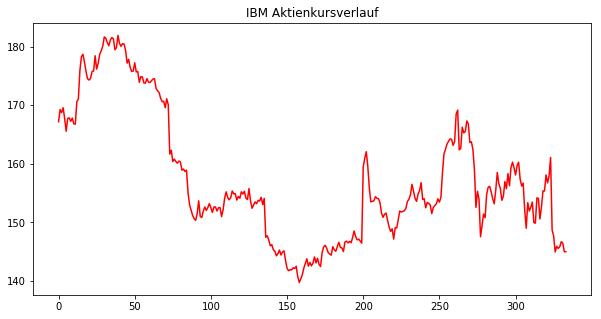

In [93]:
from matplotlib import pyplot
%matplotlib inline
datz = dataset['<CLOSE>']
#datz.head()
pyplot.figure(figsize=(10,5))
pyplot.plot(datz, color='r')
pyplot.title('IBM Aktienkursverlauf')
pyplot.show()

In [94]:
dataset['H-L'] = dataset['<HIGH>'] - dataset['<LOW>']
dataset['O-C'] = dataset['<CLOSE>'] - dataset['<OPEN>']
dataset['Close(t+1)']=dataset['<CLOSE>'].shift(-1)
#dataset["Preis_differenz"]=dataset['<CLOSE>']-dataset['<CLOSE>'].shift(-1)

In [95]:
dataset = dataset.dropna()
dataset = dataset.dropna(thresh=2)
dataset.head()

,<OPEN>,<HIGH>,<LOW>,<CLOSE>,H-L,O-C,Close(t+1)
0,167.130,167.86,166.02,167.18,1.84,0.050,169.24
1,167.615,169.84,167.42,169.24,2.42,1.625,168.72
2,169.250,169.36,167.29,168.72,2.07,-0.530,169.56
3,168.800,169.91,167.66,169.56,2.25,0.760,167.71
4,169.470,169.73,167.66,167.71,2.07,-1.760,165.55


In [96]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X= scaler.fit_transform(dataset[['<CLOSE>', 'H-L','O-C']])
y= scaler.fit_transform(dataset[['Close(t+1)']])

In [97]:
X_train = X[:252]
X_test = X[252:]
y_train = y[:252]
y_test = y[252:]

In [98]:
#X_test

In [99]:
print(len(X_train), len(X_test))
print(len(y_train),len(y_test))

252 81
252 81


In [100]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(252, 1, 3) (252, 1) (81, 1, 3) (81, 1)


In [101]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [102]:
lstm = Sequential()
lstm.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])))
lstm.add(Dense(1))
lstm.compile(loss= 'mean_squared_error', optimizer='adam')

history = lstm.fit(X_train, y_train, epochs=50, batch_size=72, validation_data=(X_test, y_test), verbose=2, shuffle=False)

Train on 252 samples, validate on 81 samples
Epoch 1/50
 - 1s - loss: 0.2514 - val_loss: 0.1518
Epoch 2/50
 - 0s - loss: 0.2351 - val_loss: 0.1375
Epoch 3/50
 - 0s - loss: 0.2191 - val_loss: 0.1240
Epoch 4/50
 - 0s - loss: 0.2039 - val_loss: 0.1113
Epoch 5/50
 - 0s - loss: 0.1895 - val_loss: 0.0994
Epoch 6/50
 - 0s - loss: 0.1757 - val_loss: 0.0884
Epoch 7/50
 - 0s - loss: 0.1628 - val_loss: 0.0782
Epoch 8/50
 - 0s - loss: 0.1506 - val_loss: 0.0687
Epoch 9/50
 - 0s - loss: 0.1391 - val_loss: 0.0600
Epoch 10/50
 - 0s - loss: 0.1283 - val_loss: 0.0522
Epoch 11/50
 - 0s - loss: 0.1183 - val_loss: 0.0452
Epoch 12/50
 - 0s - loss: 0.1091 - val_loss: 0.0390
Epoch 13/50
 - 0s - loss: 0.1006 - val_loss: 0.0337
Epoch 14/50
 - 0s - loss: 0.0929 - val_loss: 0.0293
Epoch 15/50
 - 0s - loss: 0.0861 - val_loss: 0.0256
Epoch 16/50
 - 0s - loss: 0.0800 - val_loss: 0.0227
Epoch 17/50
 - 0s - loss: 0.0746 - val_loss: 0.0205
Epoch 18/50
 - 0s - loss: 0.0700 - val_loss: 0.0190
Epoch 19/50
 - 0s - loss: 0.

In [103]:
lstm.input_shape

(None, 1, 3)

In [104]:
lstm.output_shape

(None, 1)

In [105]:
lstm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 64)                17408     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 17,473
Trainable params: 17,473
Non-trainable params: 0
_________________________________________________________________


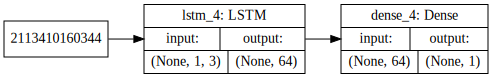

In [106]:
# Print Neural Net Model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(lstm, show_shapes=True, rankdir='LR').create(prog='dot', format='svg'))

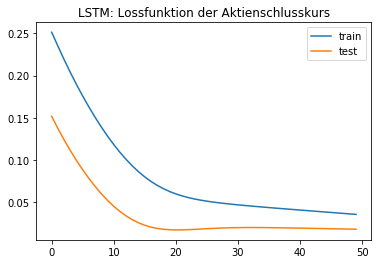

In [107]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.title('LSTM: Lossfunktion der Aktienschlusskurs')
pyplot.legend()
pyplot.show()

In [108]:
y_pre = lstm.predict(X_test)

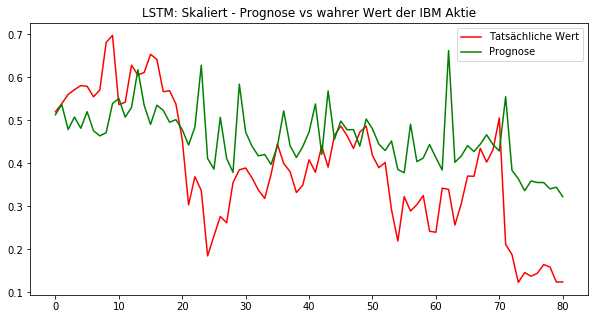

In [109]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(y_test, color='r', label='Tatsächliche Wert')
plt.plot(y_pre , color='g', label='Prognose')
plt.title('LSTM: Skaliert - Prognose vs wahrer Wert der IBM Aktie')
plt.legend()
plt.show()

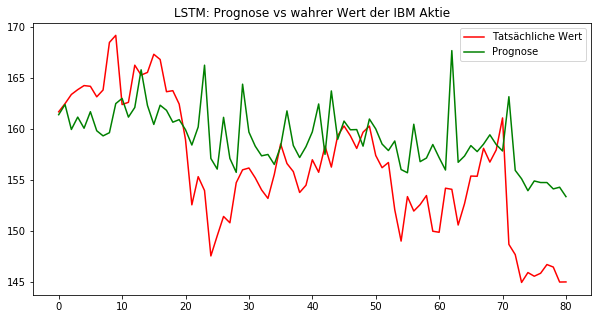

In [110]:
yhat = lstm.predict(X_test)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[2]))

from numpy import concatenate
# inverse Skalierung - Prognose
inv_yhat = concatenate((yhat, X_test[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# inverse Skalierung - Echte Daten
y_test = y_test.reshape((len(y_test), 1))
inv_y = concatenate((y_test, X_test[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

plt.figure(figsize=(10,5))
plt.plot(inv_y, color='r', label='Tatsächliche Wert')
plt.plot(inv_yhat, color='g', label='Prognose')
plt.title('LSTM: Prognose vs wahrer Wert der IBM Aktie')
plt.legend()
plt.show()

In [111]:
# Skalierte RMSE
from math import sqrt
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pre)
print('Test MSE: %.4f' % mse)

rmse = sqrt(mean_squared_error(y_test, y_pre))
print('Test RMSE: %.4f' % rmse)

Test MSE: 0.0181
Test RMSE: 0.1344


In [112]:
from math import sqrt
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(inv_y, inv_yhat)
print('Test MSE: %.4f' % mse)

rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.4f' % rmse)

Test MSE: 32.1341
Test RMSE: 5.6687


In [113]:
LP_lstm_close_skaliert=open("C:\\BÜSRA\\Uni\\Master\\Pflichtfächer\\Projekt Simulation SS 18\\Output\\Langzeit Output\\LP_LSTM_Close_skaliert.txt",'w')
print(y_test,file=LP_lstm_close_skaliert)
LP_lstm_close_skaliert.close()

In [114]:
LP_lstm_close=open("C:\\BÜSRA\\Uni\\Master\\Pflichtfächer\\Projekt Simulation SS 18\\Output\\Langzeit Output\\LP_LSTM_Close.txt",'w')
print(inv_y,file=LP_lstm_close)
LP_lstm_close.close()

In [115]:
LP_lstm_output_close_skaliert=open("C:\\BÜSRA\\Uni\\Master\\Pflichtfächer\\Projekt Simulation SS 18\\Output\\Langzeit Output\\LP_LSTM_Close_skaliert_output.txt",'w')
print(y_pre,file=LP_lstm_output_close_skaliert)
LP_lstm_output_close_skaliert.close()

In [116]:
LP_lstm_output_close=open("C:\\BÜSRA\\Uni\\Master\\Pflichtfächer\\Projekt Simulation SS 18\\Output\\Langzeit Output\\LP_LSTM_Close_output.txt",'w')
print(inv_yhat,file=LP_lstm_output_close)
LP_lstm_output_close.close()